# Imports

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
PLOT_SIZE= (15, 10)

# Load the data

In [2]:
df = pd.read_csv('data/ch04_widget_sales.csv')
df

widget_sales
0       50.496714
1       50.805493
2       51.477758
3       53.542228
4       54.873108
..            ...
495     64.087371
496     63.992081
497     63.029894
498     61.671797
499     59.443839

[500 rows x 1 columns]

## Plot the data

<Figure size 1500x1000 with 0 Axes>

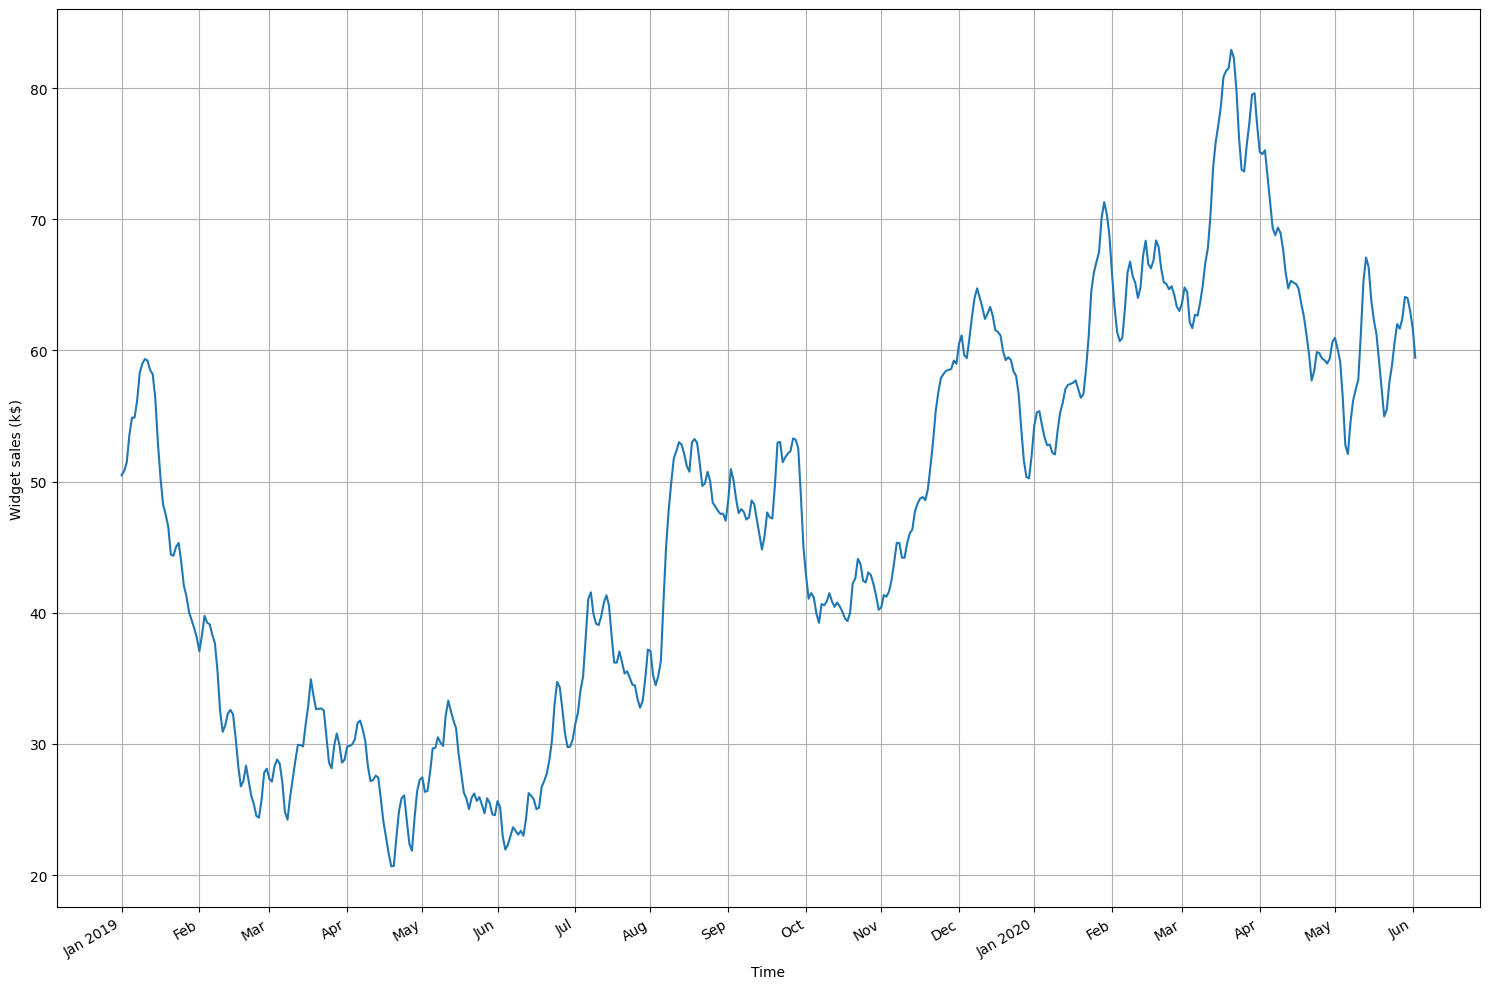

In [3]:
plt.figure(figsize=PLOT_SIZE)
fig, ax = plt.subplots(figsize = (15, 10))

ax.grid()
ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')
plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F01_peixeiro.png', dpi=300)

## Convert to DateTime Index

In [4]:
import datetime as dt
start_date=dt.datetime(year=2000,month=1,day=1)
end_date = start_date + dt.timedelta(days=len(df)-1)
print(f"Going to use start date={start_date} , end={end_date}")
new_idx=pd.date_range(start=start_date, end=end_date)
print(f"{new_idx=} , count={len(new_idx)}")

Going to use start date=2000-01-01 00:00:00 , end=2001-05-14 00:00:00
new_idx=DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2001-05-05', '2001-05-06', '2001-05-07', '2001-05-08',
               '2001-05-09', '2001-05-10', '2001-05-11', '2001-05-12',
               '2001-05-13', '2001-05-14'],
              dtype='datetime64[ns]', length=500, freq='D') , count=500


In [5]:
df_new=df.copy(deep=True)
df_new.index = new_idx
df_new

widget_sales
2000-01-01     50.496714
2000-01-02     50.805493
2000-01-03     51.477758
2000-01-04     53.542228
2000-01-05     54.873108
...                  ...
2001-05-10     64.087371
2001-05-11     63.992081
2001-05-12     63.029894
2001-05-13     61.671797
2001-05-14     59.443839

[500 rows x 1 columns]

## Plot of new data frame

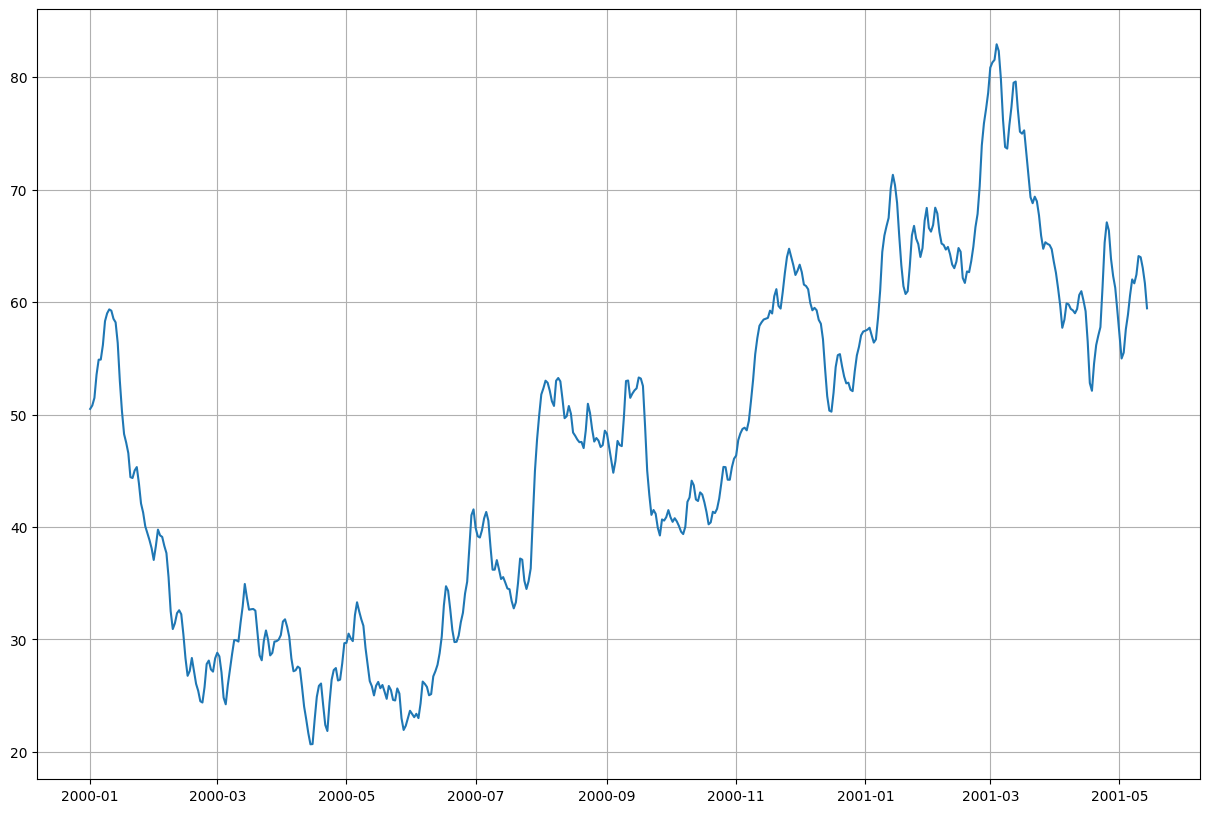

In [6]:
plt.figure(figsize=PLOT_SIZE)
plt.grid()
plt.plot(df_new)

In [7]:
df_new

widget_sales
2000-01-01     50.496714
2000-01-02     50.805493
2000-01-03     51.477758
2000-01-04     53.542228
2000-01-05     54.873108
...                  ...
2001-05-10     64.087371
2001-05-11     63.992081
2001-05-12     63.029894
2001-05-13     61.671797
2001-05-14     59.443839

[500 rows x 1 columns]

# Differencing

In [8]:
df_new["lag_1"] = df_new.shift(periods=1)
df_new["diff"] = df_new["widget_sales"] - df_new["lag_1"]
df_new

widget_sales      lag_1      diff
2000-01-01     50.496714        NaN       NaN
2000-01-02     50.805493  50.496714  0.308778
2000-01-03     51.477758  50.805493  0.672265
2000-01-04     53.542228  51.477758  2.064470
2000-01-05     54.873108  53.542228  1.330880
...                  ...        ...       ...
2001-05-10     64.087371  62.436035  1.651336
2001-05-11     63.992081  64.087371 -0.095290
2001-05-12     63.029894  63.992081 -0.962187
2001-05-13     61.671797  63.029894 -1.358097
2001-05-14     59.443839  61.671797 -2.227958

[500 rows x 3 columns]

## Plot the diff

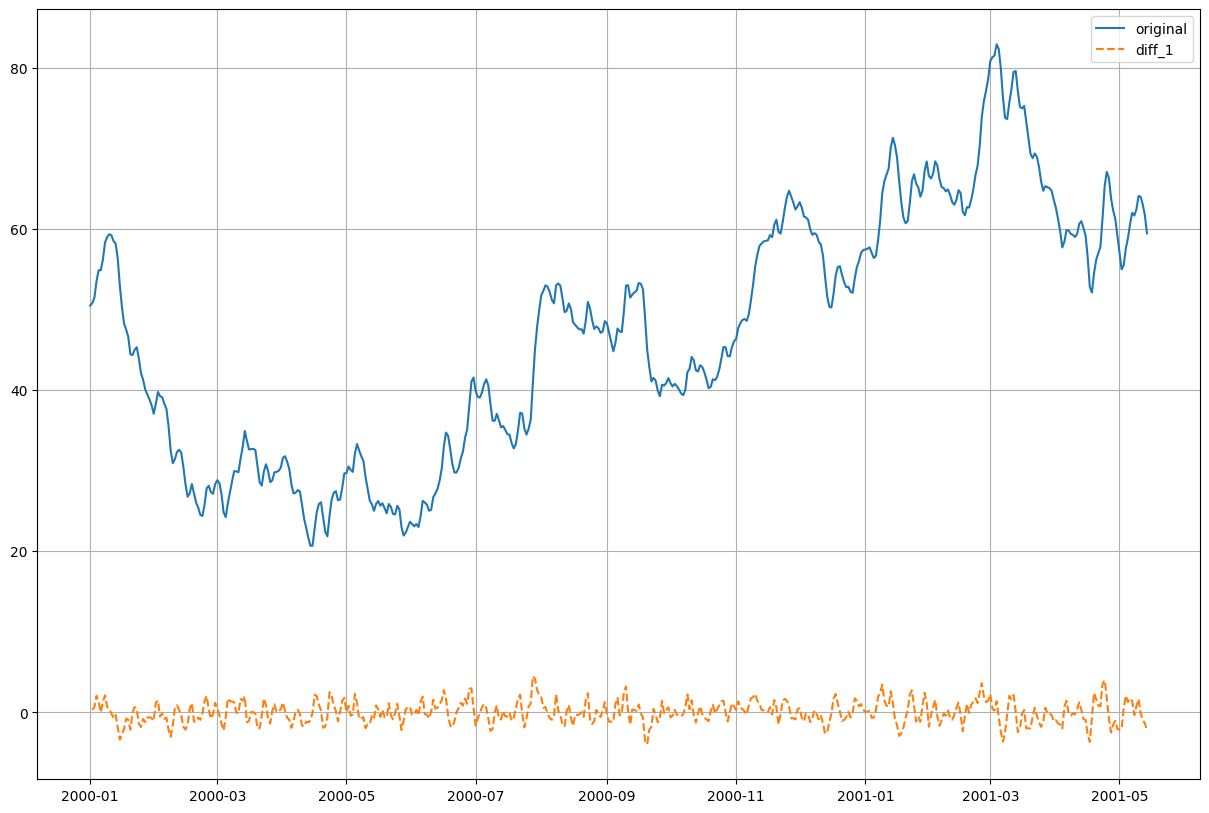

In [9]:
plt.figure(figsize=PLOT_SIZE)
plt.grid()
plt.plot(df_new["widget_sales"], label="original")
plt.plot(df_new["diff"], label="diff_1", linestyle="--")
plt.legend()

# ADF tests

## Original frame

In [10]:
ADF_result = adfuller(df_new["widget_sales"])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662069359045
p-value: 0.5274845352272606


## Diff frame

In [11]:
ADF_result = adfuller(df_new["diff"].dropna())

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19


# ACF plots

## Original frame

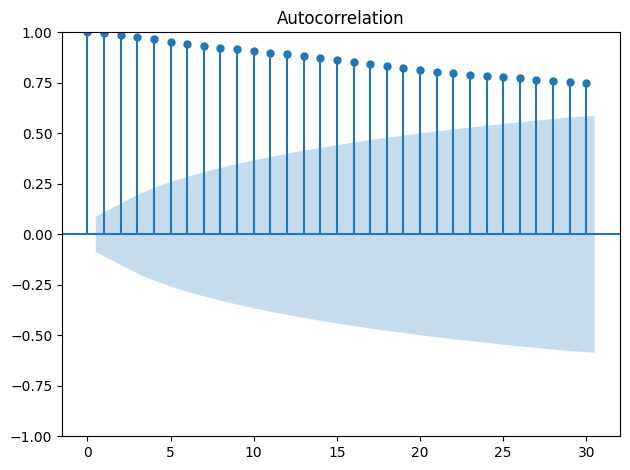

In [12]:
plot_acf(df_new["widget_sales"], lags=30);

plt.tight_layout()


## Diff frame

In [13]:
df_new

widget_sales      lag_1      diff
2000-01-01     50.496714        NaN       NaN
2000-01-02     50.805493  50.496714  0.308778
2000-01-03     51.477758  50.805493  0.672265
2000-01-04     53.542228  51.477758  2.064470
2000-01-05     54.873108  53.542228  1.330880
...                  ...        ...       ...
2001-05-10     64.087371  62.436035  1.651336
2001-05-11     63.992081  64.087371 -0.095290
2001-05-12     63.029894  63.992081 -0.962187
2001-05-13     61.671797  63.029894 -1.358097
2001-05-14     59.443839  61.671797 -2.227958

[500 rows x 3 columns]

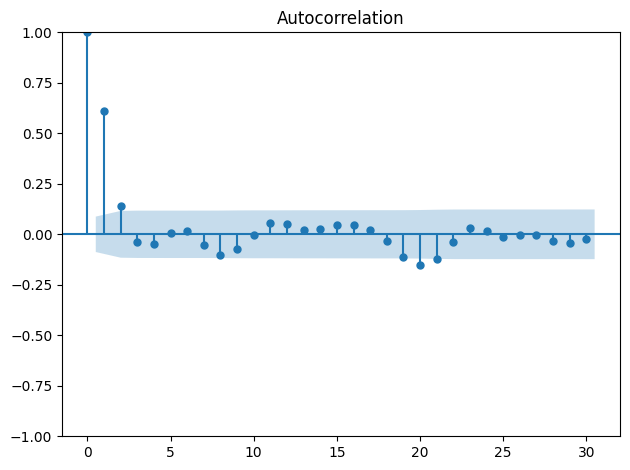

In [14]:
# Remember to dropna() otherwise the plot will show up blank
plot_acf(df_new["diff"].dropna(), lags=30);

plt.tight_layout()


# Split train-test

In [15]:
df_diff = pd.DataFrame({'widget_sales_diff': df_new["diff"].dropna()})

train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(f"train={len(train)}")
print(f"test={len(test)}")

train=449
test=50


In [16]:
pred_df = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

# Forecasting-mean

In [17]:
from enum import Enum
class PredictionType(Enum):
    MEAN = 1
    LAST = 2
    MOVING_AVERAGE = 3


## Function definition

In [18]:
def rolling_forecast_mean(df: pd.DataFrame, train_len: int, horizon: int, window: int) -> list:
    total_len = train_len + horizon
    pred_mean = []
    
    for i in range(train_len, total_len, window):
        mean = np.mean(df[:i].values)
        pred_mean.extend(mean for _ in range(window))

    return pred_mean


In [19]:
pred_mean = rolling_forecast_mean(df=df_diff, train_len=TRAIN_LEN, horizon=HORIZON ,window=WINDOW)
#pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_df["pred_mean"]=pred_mean
print(f"Length of prediction={len(pred_mean)}")

Length of prediction=50


## Plot

In [20]:
plottable_df=pd.concat([df_new["widget_sales"] , df_new["diff"], pred_df["pred_mean"]  ] ,axis=1)
plottable_df

widget_sales      diff  pred_mean
2000-01-01     50.496714       NaN        NaN
2000-01-02     50.805493  0.308778        NaN
2000-01-03     51.477758  0.672265        NaN
2000-01-04     53.542228  2.064470        NaN
2000-01-05     54.873108  1.330880        NaN
...                  ...       ...        ...
2001-05-10     64.087371  1.651336   0.022653
2001-05-11     63.992081 -0.095290   0.027456
2001-05-12     63.029894 -0.962187   0.027456
2001-05-13     61.671797 -1.358097   0.025218
2001-05-14     59.443839 -2.227958   0.025218

[500 rows x 3 columns]

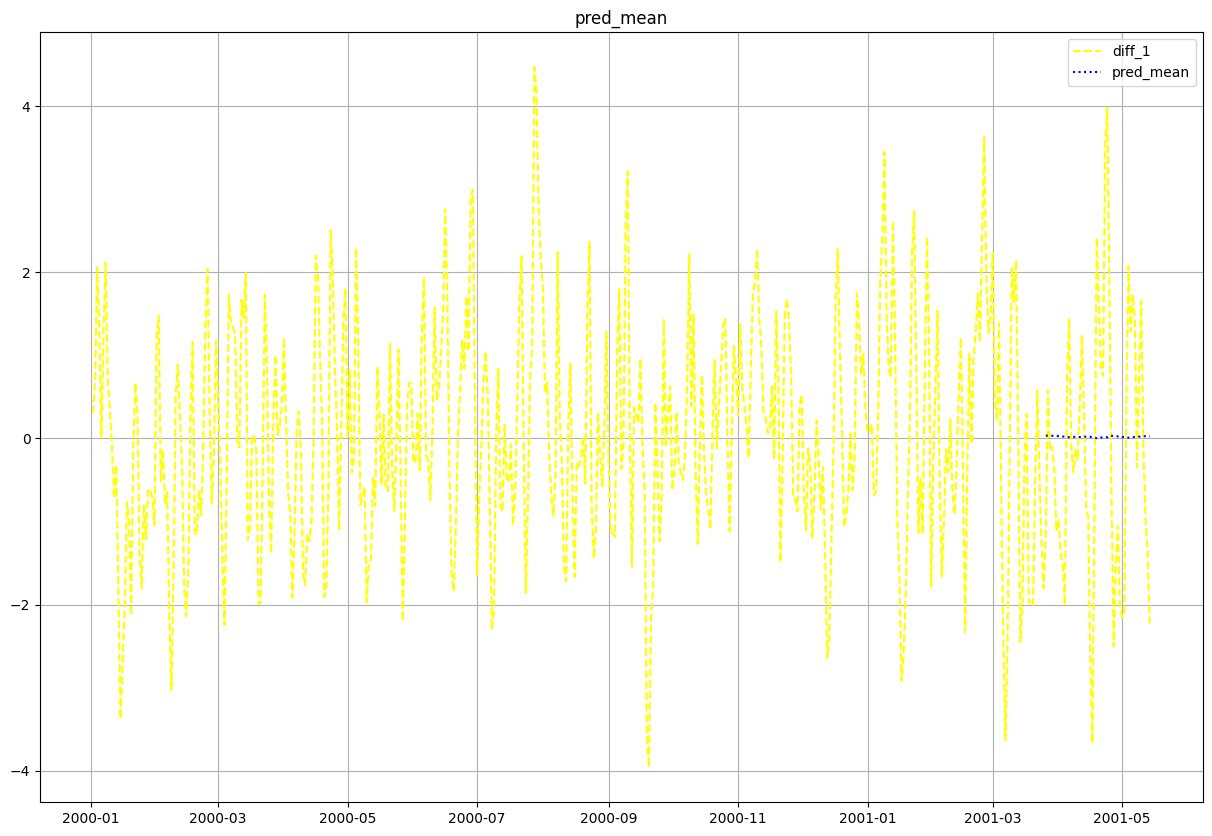

In [21]:
plt.figure(figsize=PLOT_SIZE)
plt.grid()
#plt.plot(df_new["widget_sales"], label="original")
plt.plot(df_new["diff"], label="diff_1", linestyle="--", color="yellow")
plt.plot(pred_df["pred_mean"], label="pred_mean", linestyle="dotted", color="blue")
plt.title(f"pred_mean")
plt.legend()

# Forecast-last

## Function definition

In [22]:
def rolling_forecast_last(df: pd.DataFrame, train_len: int, horizon: int, window: int) -> list:
    total_len = train_len + horizon
    pred_last_value = []
        
    for i in range(train_len, total_len, window):
        last_value = df[:i].iloc[-1].values[0]
        pred_last_value.extend(last_value for _ in range(window))
        
    return pred_last_value


In [23]:
pred_last = rolling_forecast_last(df=df_diff, train_len=TRAIN_LEN, horizon=HORIZON ,window=WINDOW)
#pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_df["pred_last"]=pred_last
print(f"Length of prediction={len(pred_last)}")


Length of prediction=50


In [24]:
pred_df.tail()

widget_sales_diff  pred_mean  pred_last
2001-05-10           1.651336   0.022653  -0.347669
2001-05-11          -0.095290   0.027456   1.651336
2001-05-12          -0.962187   0.027456   1.651336
2001-05-13          -1.358097   0.025218  -0.962187
2001-05-14          -2.227958   0.025218  -0.962187

## Plot

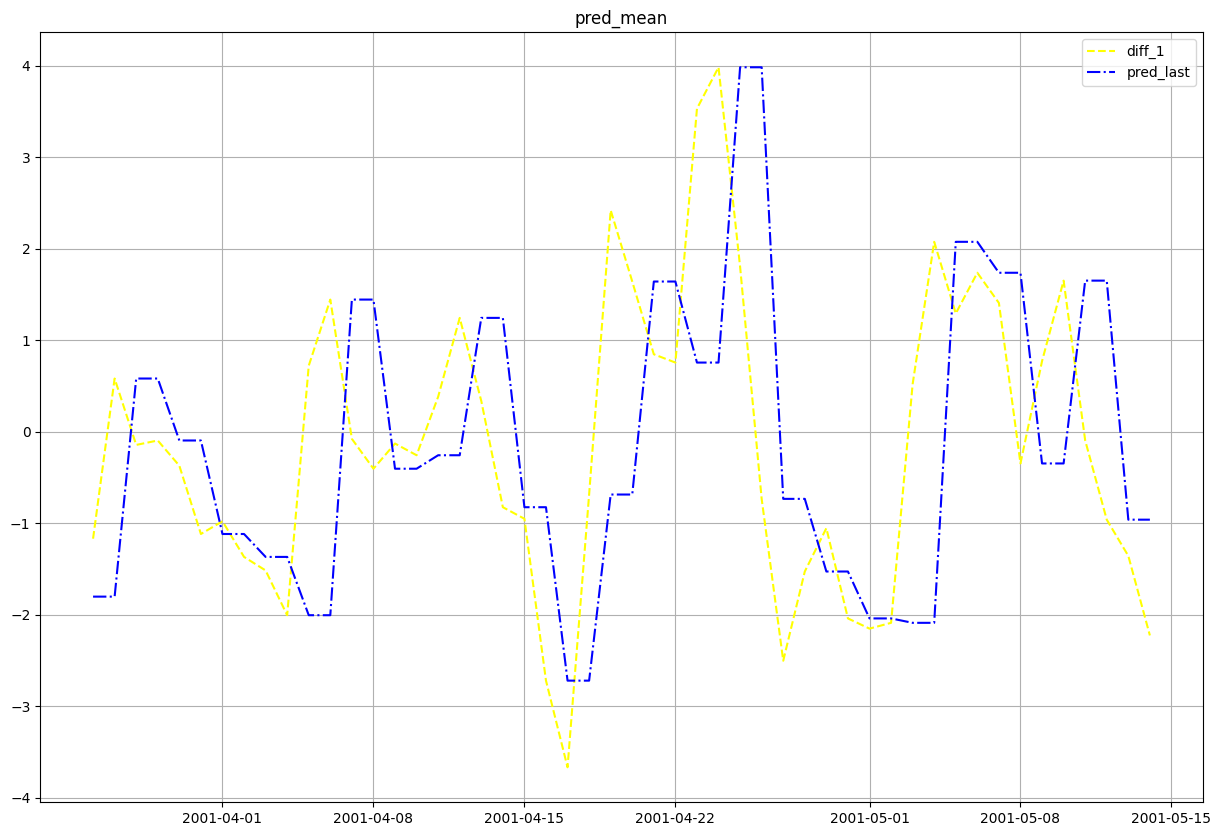

In [25]:
plt.figure(figsize=PLOT_SIZE)
plt.grid()
#plt.plot(df_new["widget_sales"], label="original")
plt.plot(df_new["diff"][-HORIZON:], label="diff_1", linestyle="--", color="yellow")
plt.plot(pred_df["pred_last"][-HORIZON:], label="pred_last", linestyle="-.", color="blue")
plt.title(f"pred_mean")
plt.legend()

# Forecast-Moving Average

## Function definition

In [26]:
def rolling_forecast_ma(df: pd.DataFrame, train_len: int, horizon: int, window: int, maorder: int) -> list:
    total_len = train_len + horizon
    pred_MA = []
        
    for i in range(train_len, total_len, window):
        model = SARIMAX(df[:i], order=(0,0,maorder))
        res = model.fit(disp=False)
        predictions = res.get_prediction(0, i + window - 1)
        oos_pred = predictions.predicted_mean.iloc[-window:]
        pred_MA.extend(oos_pred)
        
    return pred_MA

## Plot (order=2)

In [27]:
pred_ma = rolling_forecast_ma(df=df_diff, train_len=TRAIN_LEN, horizon=HORIZON ,window=WINDOW, maorder=2)
pred_df["pred_ma"]=pred_ma
print(f"Length of prediction={len(pred_ma)}")

Length of prediction=50


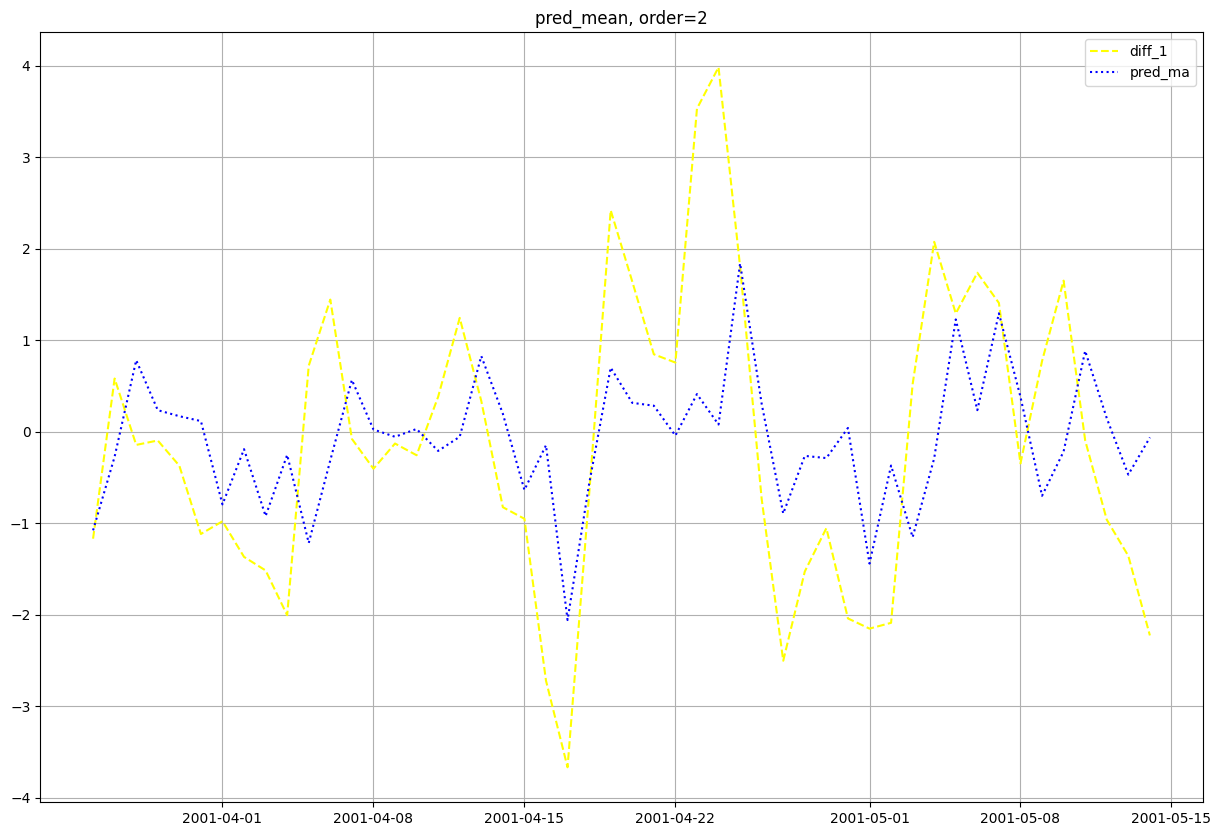

In [28]:
plt.figure(figsize=PLOT_SIZE)
plt.grid()
#plt.plot(df_new["widget_sales"], label="original")
plt.plot(df_new["diff"][-HORIZON:], label="diff_1", linestyle="--", color="yellow")
plt.plot(pred_df["pred_ma"][-HORIZON:], label="pred_ma", linestyle="dotted", color="blue")
plt.title(f"pred_mean, order=2")
plt.legend()

## Plot(order=4)

In [29]:
pred_ma_4 = rolling_forecast_ma(df=df_diff, train_len=TRAIN_LEN, horizon=HORIZON ,window=WINDOW, maorder=4)
pred_df["pred_ma_4"]=pred_ma_4
print(f"Length of prediction={len(pred_ma_4)}")

Length of prediction=50


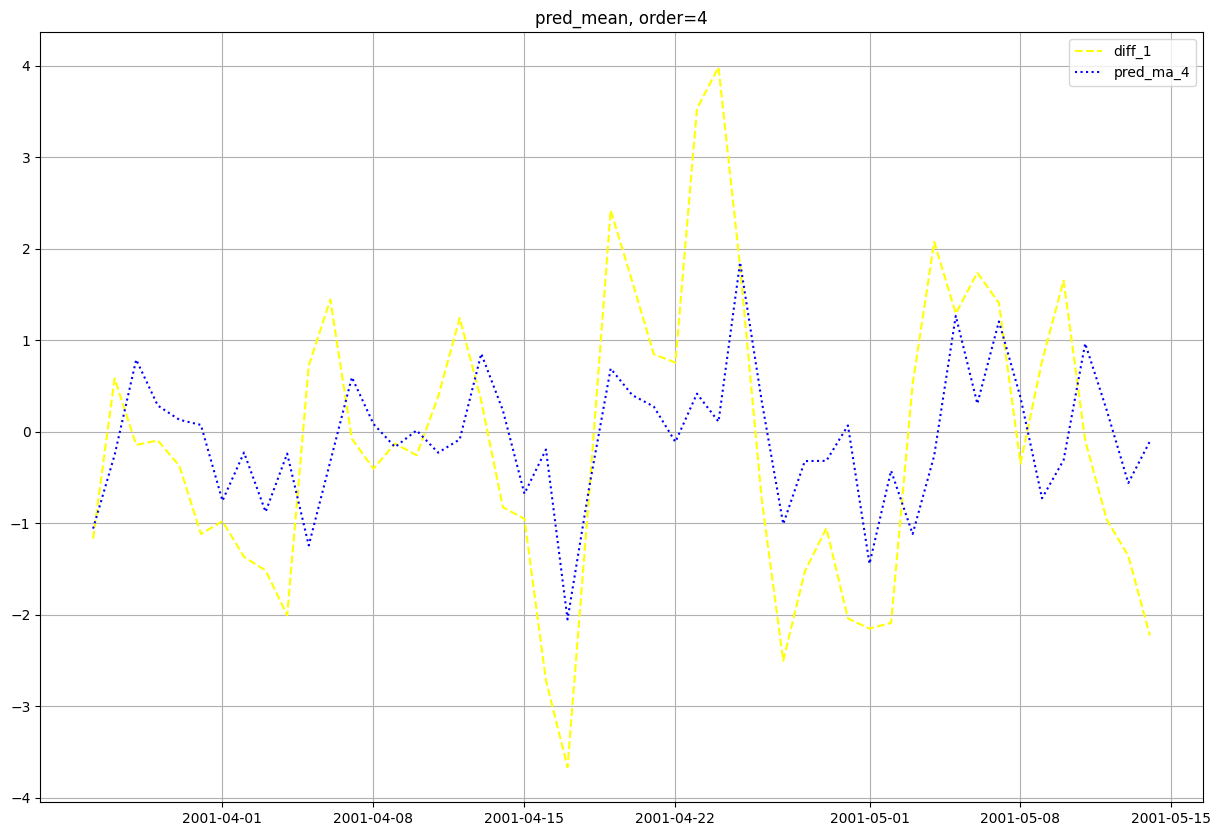

In [30]:
plt.figure(figsize=PLOT_SIZE)
plt.grid()
#plt.plot(df_new["widget_sales"], label="original")
plt.plot(df_new["diff"][-HORIZON:], label="diff_1", linestyle="--", color="yellow")
plt.plot(pred_df["pred_ma_4"][-HORIZON:], label="pred_ma_4", linestyle="dotted", color="blue")
plt.title(f"pred_mean, order=4")
plt.legend()

In [31]:
pred_df

widget_sales_diff  pred_mean  pred_last   pred_ma  pred_ma_4
2001-03-26          -1.170131   0.034319  -1.803658 -1.078833  -1.059792
2001-03-27           0.580967   0.034319  -1.803658 -0.273309  -0.254669
2001-03-28          -0.144902   0.032861   0.580967  0.781223   0.787598
2001-03-29          -0.096564   0.032861   0.580967  0.234969   0.285751
2001-03-30          -0.372334   0.032183  -0.096564  0.168994   0.130173
2001-03-31          -1.118891   0.032183  -0.096564  0.115810   0.073460
2001-04-01          -0.979693   0.028764  -1.118891 -0.795666  -0.755822
2001-04-02          -1.369431   0.028764  -1.118891 -0.191286  -0.227680
2001-04-03          -1.517477   0.023498  -1.369431 -0.922824  -0.876991
2001-04-04          -2.006735   0.023498  -1.369431 -0.254060  -0.239551
2001-04-05           0.720540   0.015717  -2.006735 -1.217301  -1.244288
2001-04-06           1.444153   0.015717  -2.006735 -0.312425  -0.325848
2001-04-07          -0.078571   0.020345   1.444153  0.565768   0.595038
2001-04-08          -0.405194   0.020345   1.444153  0.023722   0.084836
2001-04-09          -0.129664   0.019212  -0.405194 -0.055982  -0.168531
2001-04-10          -0.257871   0.019212  -0.405194  0.029389   0.014115
2001-04-11           0.381596   0.018296  -0.257871 -0.210535  -0.229622
2001-04-12           1.243967   0.018296  -0.257871 -0.055502  -0.084534
2001-04-13           0.335506   0.021698   1.243967  0.826306   0.852402
2001-04-14          -0.826017   0.021698   1.243967  0.196147   0.233731
2001-04-15          -0.952438   0.020560  -0.826017 -0.637378  -0.678160
2001-04-16          -2.722213   0.020560  -0.826017 -0.148658  -0.195086
2001-04-17          -3.669436   0.012671  -2.722213 -2.059461  -2.052812
2001-04-18          -0.687374   0.012671  -2.722213 -0.572021  -0.612650
2001-04-19           2.420597   0.003406  -0.687374  0.699851   0.690128
2001-04-20           1.641497   0.003406  -0.687374  0.315069   0.399521
2001-04-21           0.845915   0.011944   1.641497  0.283885   0.274024
2001-04-22           0.755441   0.011944   1.641497 -0.042947  -0.112596
2001-04-23           3.531973   0.015251   0.755441  0.410789   0.415310
2001-04-24           3.983943   0.015251   0.755441  0.077970   0.109236
2001-04-25           1.803364   0.030878   3.983943  1.839613   1.852262
2001-04-26          -0.734794   0.030878   3.983943  0.305052   0.338808
2001-04-27          -2.504808   0.032971  -0.734794 -0.895170  -1.010162
2001-04-28          -1.529000   0.032971  -0.734794 -0.265056  -0.321744
2001-04-29          -1.055167   0.024483  -1.529000 -0.288781  -0.319008
2001-04-30          -2.041930   0.024483  -1.529000  0.040554   0.068172
2001-05-01          -2.153506   0.017996  -2.041930 -1.442341  -1.444855
2001-05-02          -2.090140   0.017996  -2.041930 -0.370186  -0.426316
2001-05-03           0.519777   0.009209  -2.090140 -1.153834  -1.118928
2001-05-04           2.075603   0.009209  -2.090140 -0.291015  -0.262796
2001-05-05           1.291646   0.014478   2.075603  1.227388   1.266313
2001-05-06           1.737261   0.014478   2.075603  0.234982   0.305275
2001-05-07           1.406926   0.020588   1.737261  1.294212   1.204932
2001-05-08          -0.347669   0.020588   1.737261  0.380279   0.375093
2001-05-09           0.771179   0.022653  -0.347669 -0.701249  -0.728293
2001-05-10           1.651336   0.022653  -0.347669 -0.216956  -0.310448
2001-05-11          -0.095290   0.027456   1.651336  0.883190   0.964354
2001-05-12          -0.962187   0.027456   1.651336  0.147379   0.233798
2001-05-13          -1.358097   0.025218  -0.962187 -0.469798  -0.561304
2001-05-14          -2.227958   0.025218  -0.962187 -0.063600  -0.105156

# Unfold the diff values

In [32]:
len(pred_df)

50

In [33]:
len(pred_ma)

50

In [34]:
len(df_new)

500

In [35]:
len(test)
test.head(3), test.tail(3)

(            widget_sales_diff
 2001-03-26          -1.170131
 2001-03-27           0.580967
 2001-03-28          -0.144902,
             widget_sales_diff
 2001-05-12          -0.962187
 2001-05-13          -1.358097
 2001-05-14          -2.227958)

In [36]:
len(df_new)
df_new.tail(3)

widget_sales      lag_1      diff
2001-05-12     63.029894  63.992081 -0.962187
2001-05-13     61.671797  63.029894 -1.358097
2001-05-14     59.443839  61.671797 -2.227958

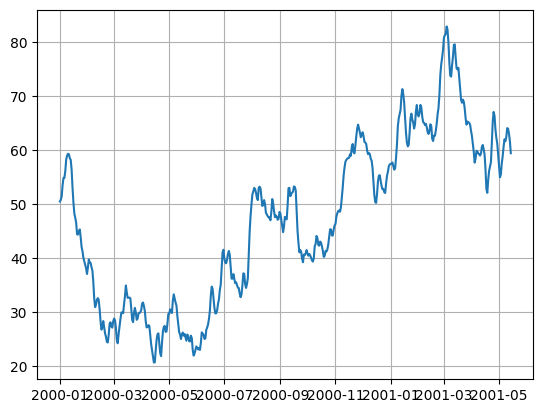

In [37]:
plt.grid()
plt.plot(df_new["widget_sales"])

In [38]:
test.head(3)

widget_sales_diff
2001-03-26          -1.170131
2001-03-27           0.580967
2001-03-28          -0.144902

## The first test value

In [39]:
#last_actual_value = df["widget_sales"].iloc[-1]
last_actual_value = float(test.iloc[0])
last_actual_value = float(df_new["widget_sales"].iloc[450])
last_actual_value

64.73600498852782

In [40]:
pred_df["pred_ma"].head()

2001-03-26   -1.078833
2001-03-27   -0.273309
2001-03-28    0.781223
2001-03-29    0.234969
2001-03-30    0.168994
Freq: D, Name: pred_ma, dtype: float64

In [41]:
pred_df["pred_ma"].tail()

2001-05-10   -0.216956
2001-05-11    0.883190
2001-05-12    0.147379
2001-05-13   -0.469798
2001-05-14   -0.063600
Freq: D, Name: pred_ma, dtype: float64

## Cumulative sum of the MA

In [42]:
cumulative_diffs=pred_df["pred_ma"].cumsum()
cumulative_diffs.head(4)

2001-03-26   -1.078833
2001-03-27   -1.352142
2001-03-28   -0.570919
2001-03-29   -0.335950
Freq: D, Name: pred_ma, dtype: float64

In [43]:
df_unfold=pd.DataFrame()
df_unfold = last_actual_value + cumulative_diffs
df_unfold.tail()

2001-05-10    60.335201
2001-05-11    61.218392
2001-05-12    61.365771
2001-05-13    60.895973
2001-05-14    60.832373
Freq: D, Name: pred_ma, dtype: float64

In [44]:
df_combine=pd.concat([df_unfold, df_new["widget_sales"] ], axis=1)
df_combine

pred_ma  widget_sales
2000-01-01        NaN     50.496714
2000-01-02        NaN     50.805493
2000-01-03        NaN     51.477758
2000-01-04        NaN     53.542228
2000-01-05        NaN     54.873108
...               ...           ...
2001-05-10  60.335201     64.087371
2001-05-11  61.218392     63.992081
2001-05-12  61.365771     63.029894
2001-05-13  60.895973     61.671797
2001-05-14  60.832373     59.443839

[500 rows x 2 columns]

## Plot of predictions

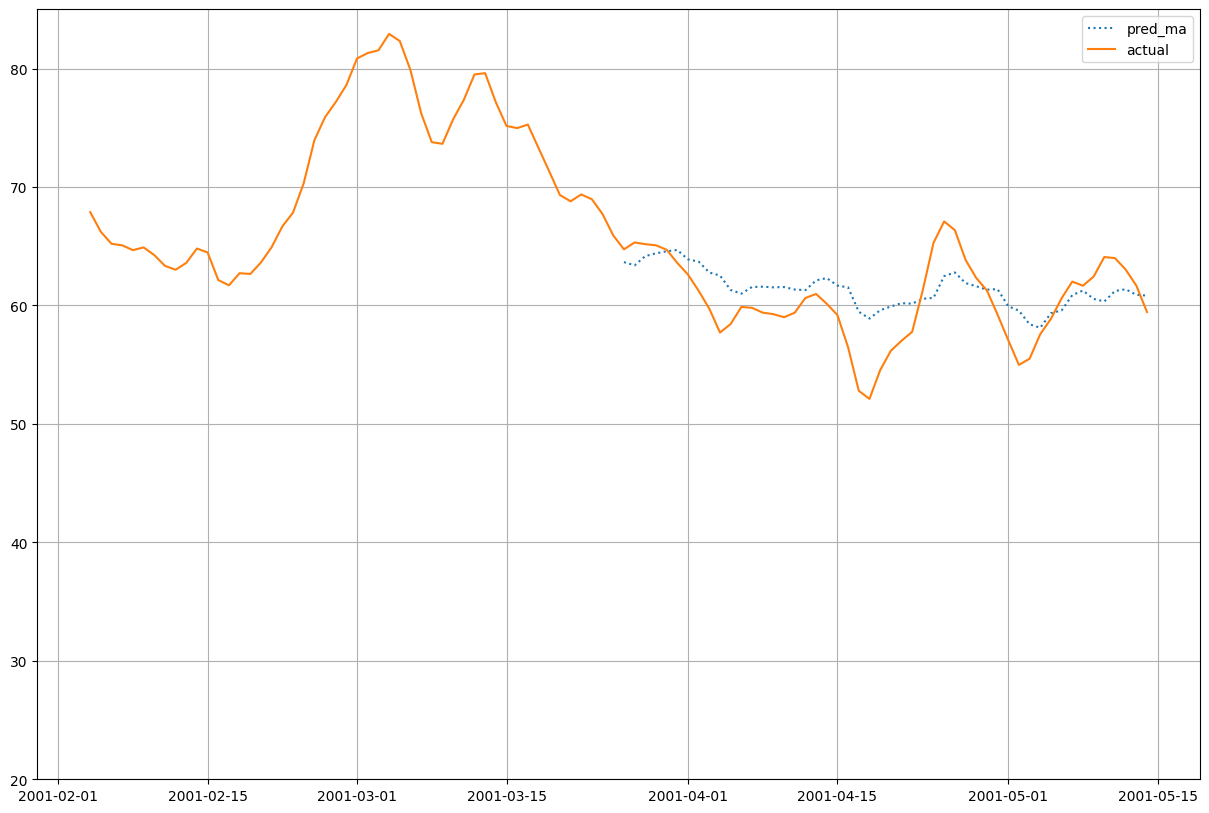

In [45]:
plt.figure(figsize=PLOT_SIZE)
plt.grid()
count=100
plt.plot(df_combine["pred_ma"][-count:],linestyle="dotted", label="pred_ma")
plt.plot(df_combine["widget_sales"][-count:],linestyle="solid", label="actual")
plt.ylim(20,85)
plt.legend()

# Find the MAE

In [50]:
l=list(range(10))
l[3:]

[3, 4, 5, 6, 7, 8, 9]

In [49]:
import sklearn.metrics as skm

In [53]:
skm.mean_absolute_error(df_combine["pred_ma"][450:], df_combine["widget_sales"][450:])

2.3244709244319224